Go to classification and run `python get_base_parses.py --run_id 10` to get started.

AttributeError: FancyArrow.set() got an unexpected keyword argument 'fillstyle'

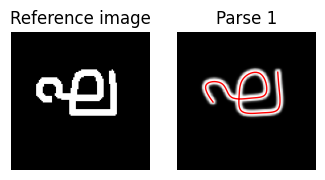

In [89]:
import matplotlib.pyplot as plt
from gns.rendering import Renderer
from pybpl.splines import get_stk_from_bspline
import torch

# Load up the inverse map
item = 4
run = 10

with open(f'../classification/one-shot-classification/all_runs/run{run+1:02}/class_labels.txt') as f:
    data = f.readlines()

test_to_train = {}
for line in data:
    left, right = line.split(' ')
    test_to_train[left.split('/')[-1]] = right.split('/')[-1].strip()

plt.figure(figsize=(12.5, 2.5))
train_im = test_to_train[f'item{item:02}.png']

plt.subplot(1, 6, 1)
plt.imshow(1 - plt.imread(f'../classification/one-shot-classification/all_runs/run{run+1:02}/training/{train_im}'), cmap='gray')
plt.title('Reference image')
plt.axis('off')

for i in range(5):
    try:
        parse = torch.load(f'../classification/results/run{run+1:02}/base_parses/train_{item-1:02}/parse_{i}.pt')
    except FileNotFoundError:
        continue
    drawings = [get_stk_from_bspline(x) for x in parse]
    r = Renderer()
    plt.subplot(1, 6, i+2)
    plt.imshow(r(drawings), cmap='gray')
    plt.axis('off')
    plt.title(f'Parse {i+1}')

    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, d in enumerate(drawings):
        plt.plot(d[:, 0], - d[:, 1], colors[i], linewidth=1)
        plt.arrow(d[-2, 0], - d[-2, 1], d[-1, 0] - d[-2, 0], - (d[-1, 1] - d[-2, 1]), color=colors[i], 
                  linewidth=5, head_width=0.1, head_length=0.1, length_includes_head=False, fillstyle='full')
        plt.plot(d[0, 0], - d[0, 1], 'w.', markersize=20, fillstyle='none')
        